In [1]:
import os
import numpy as np
pth = r'\\10.99.68.52\Kiemendata\Valentina Matos\Jaime\human pancreas ready to train'
pthim = os.path.join(pth, '5x')
umpix = 2
#pthtest = os.path.join(pth, 'testing images')
#pthtestim = os.path.join(pthtest, '5x')
nm = 'CODA_python_25_07_2024'

WS = [[2, 0, 0, 1, 0, 0, 2, 0, 0, 2], [7, 6], 
      [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 
      [6, 5, 4, 1, 2, 3, 8, 10, 9, 7], [9]]
numclass = max(WS[2])
sxy = 1024
pthDL = os.path.join(pth, nm)
nblack = numclass + 1
nwhite = WS[1][0]
cmap = np.array([[121, 248, 252],
                  [0, 0, 255],
                  [80, 237, 80],
                  [255, 255, 0],
                  [149, 35, 245],
                  [255, 194, 245],
                  [255, 255, 255],
                  [255, 0, 0],
                  [64, 128, 128],
                  [73, 120, 111]])
classNames = ['islet', 'duct', 'blood vessel', 'fat','acini','ecm','whitespace','PanIN', 'PDAC','nerve']
classCheck = []
ntrain = 15
nvalidate = np.ceil(ntrain/5)
numims = 2

Saving model metadata and classification colormap...
Creating Net metadata file...
Plotting cmap took 0.0 minutes and 0.017001867294311523 seconds
Saving metadata took 0.0 minutes and 0.05701875686645508 seconds


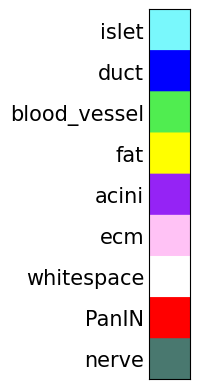

In [2]:
from save_model_metadata import save_model_metadata
save_model_metadata(pthDL, pthim, WS, nm, umpix, cmap, sxy, classNames, ntrain, nvalidate)

In [3]:
from load_annotation_data import load_annotation_data
[ctlist0, numann0] = load_annotation_data(pthDL, pth, pthim, classCheck)

 
Importing annotation data...
Image 1 of 5: 6520-197 HE
Checking parameters took 0.0 minutes and 0.17320513725280762 seconds
 annotation data previously loaded
Image 2 of 5: S08-07401 1K
Checking parameters took 0.0 minutes and 0.09558844566345215 seconds
 annotation data previously loaded
Image 3 of 5: S12-62356 1P1
Checking parameters took 0.0 minutes and 0.15479278564453125 seconds
 annotation data previously loaded
Image 4 of 5: S14-03572 1E
Checking parameters took 0.0 minutes and 0.0964508056640625 seconds
 annotation data previously loaded
Image 5 of 5: S14-19326 1FSCK
Checking parameters took 0.0 minutes and 0.11504507064819336 seconds
 annotation data previously loaded


In [4]:
from BB_avg_size import BB_avg_size
avg_size = BB_avg_size(ctlist0)

17814.25
596


In [ ]:
from create_training_tiles import create_training_tiles
create_training_tiles(pthDL, numann0, ctlist0)


Calculating total number of pixels in the training dataset...
 There are 83475400.0 pixels of islet, 62% of the most common class.
 There are 13532900.0 pixels of duct, 10% of the most common class.
 There are 55550100.0 pixels of blood vessel, 41% of the most common class.
 There are 117245800.0 pixels of fat, 87% of the most common class.
 There are 70479100.0 pixels of acini, 52% of the most common class.
 There are 133900000.0 pixels of ecm. This is the most common class.
 There are 127966300.0 pixels of whitespace, 95% of the most common class.
 There are 8878500.0 pixels of PanIN, 6% of the most common class.
 There are 30493300.0 pixels of nerve, 22% of the most common class.

Building training tiles...
Starting time for the while loop


Physical devices cannot be modified after being initialized
Starting model training...
Epoch 1/8
375/375 [==============================] - 124s 301ms/step - loss: 0.2840 - accuracy: 0.8996 - val_loss: 0.3671 - val_accuracy: 0.8881
Epoch 2/8
375/375 [==============================] - 110s 291ms/step - loss: 0.1562 - accuracy: 0.9436 - val_loss: 0.1514 - val_accuracy: 0.9446
Epoch 3/8
375/375 [==============================] - 111s 295ms/step - loss: 0.1264 - accuracy: 0.9534 - val_loss: 0.1391 - val_accuracy: 0.9483
Epoch 4/8
375/375 [==============================] - 109s 290ms/step - loss: 0.1092 - accuracy: 0.9591 - val_loss: 0.1460 - val_accuracy: 0.9481
Epoch 5/8
375/375 [==============================] - 113s 301ms/step - loss: 0.1041 - accuracy: 0.9607 - val_loss: 0.1243 - val_accuracy: 0.9546
Epoch 6/8
375/375 [==============================] - 109s 290ms/step - loss: 0.0931 - accuracy: 0.9644 - val_loss: 0.1180 - val_accuracy: 0.9563
Epoch 7/8
375/375 [========================

INFO:tensorflow:Assets written to: \\10.99.68.52\Kiemendata\Valentina Matos\Jaime\human pancreas ready to train\CODA_python_25_07_2024\net\assets


INFO:tensorflow:Assets written to: \\10.99.68.52\Kiemendata\Valentina Matos\Jaime\human pancreas ready to train\CODA_python_25_07_2024\net\assets


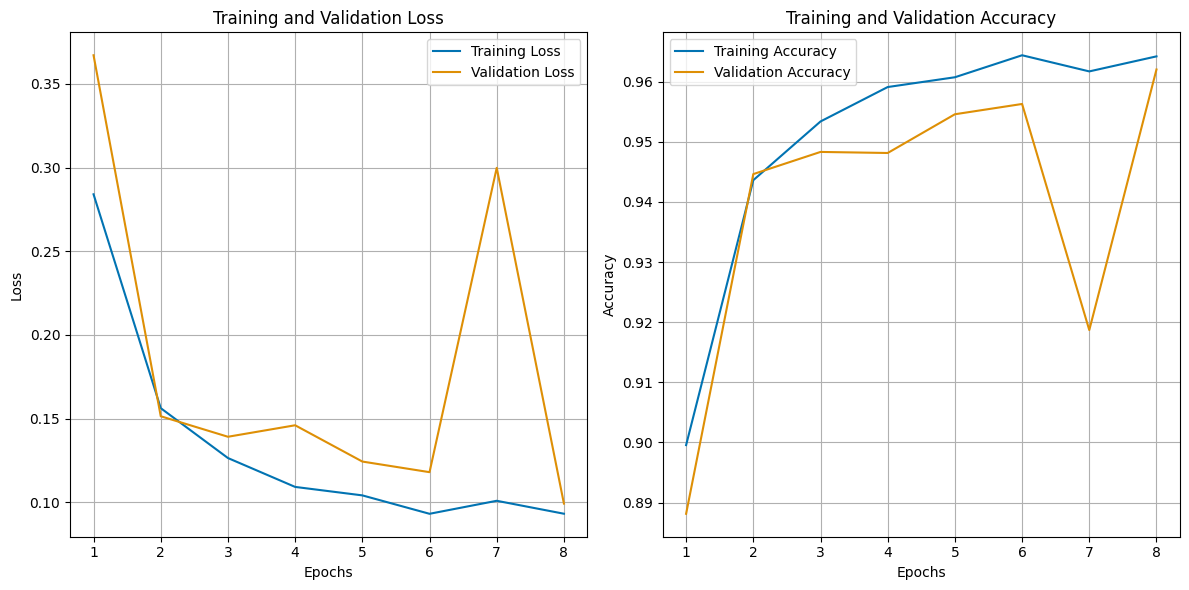

In [5]:
from train_segmentation_model import train_segmentation_model
train_segmentation_model(pthDL, fine_tune=True)

   
  Starting classification of image 1 of 5: 6520-197 HE.png
   Tile: 1 of 204
   Tile: 1 of 204 at (1024, 1024), size: (1024, 1024, 3)
1/1 [==============================] - 2s 2s/step
   Tile: 2 of 204
   Tile: 2 of 204 at (1024, 1848), size: (1024, 1024, 3)
1/1 [==============================] - 0s 16ms/step
   Tile: 3 of 204
   Tile: 3 of 204 at (1024, 2672), size: (1024, 1024, 3)
1/1 [==============================] - 0s 16ms/step
   Tile: 4 of 204
   Tile: 4 of 204 at (1024, 3496), size: (1024, 1024, 3)
1/1 [==============================] - 0s 10ms/step
   Tile: 5 of 204
   Tile: 5 of 204 at (1024, 4320), size: (1024, 1024, 3)
1/1 [==============================] - 0s 20ms/step
   Tile: 6 of 204
   Tile: 6 of 204 at (1024, 5144), size: (1024, 1024, 3)
1/1 [==============================] - 0s 19ms/step
   Tile: 7 of 204
   Tile: 7 of 204 at (1024, 5968), size: (1024, 1024, 3)
1/1 [==============================] - 0s 16ms/step
   Tile: 8 of 204
   Tile: 8 of 204 at (1024, 6792

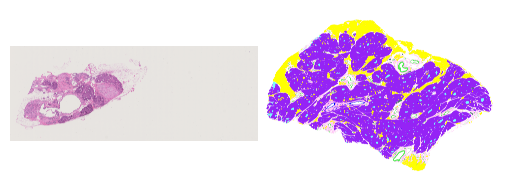

'\\\\10.99.68.52\\Kiemendata\\Valentina Matos\\Jaime\\human pancreas ready to train\\5x\\classification_CODA_python_25_07_2024'

In [2]:
from classify_images import classify_images
classify_images(pthim,pthDL)

In [4]:
1%12

1